# Descriptive Analysis

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

master = pd.read_csv('preproc_dataset.csv', sep = ';', encoding = 'utf-8')

# reduce e.g. Britain, Germany nationality to the first mentioned nationality, i.e. Britain
master.nationality = master.nationality.apply(lambda x: x.split(',')[0])
master.nationality = master.nationality.apply(lambda x: x.split('-')[0])

uni_df = master.drop_duplicates('affiliation')[['affiliation', 'uni_nationality', 'continent']]
lau_df = master.drop_duplicates('laureate_name')[['laureate_name', 'nationality', 'birthyear', 'gender_mf']]

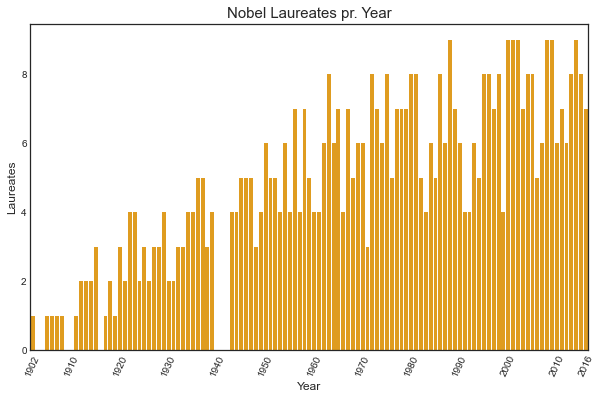

In [41]:
''' Laureates pr. year '''
_vals = master.drop_duplicates(['laureate_name','prize_year']).groupby('prize_year').agg('size')
# Set year with no value to 0 and add to the data 
data_dict = {key:val for key, val in zip(_vals.index, _vals.values)}
# update dict 
[data_dict.update({key:0}) for key in range(min(_vals.index),max(_vals.index)) \
                            if key not in data_dict.keys()];

# Get year ticks every 10'th year 
_ticks = [min(_vals.index)] + list(range(math.ceil(min(_vals.index)/10)*10,
                                         math.ceil(max(_vals.index)/10)*10,
                                         10)) + [max(_vals.index)]

# set labels to "" if not in the 10'th year _ticks                            
_labels = [str(int(x)) if x in _ticks else '' for x in sorted(list(data_dict.keys()))]

''' Which countries are missing '''
plt.style.use("seaborn-white")
fig, ax = plt.subplots(figsize=(10, 6))
plt.title('Nobel Laureates pr. Year', size = 15)

''' Hvem er missing i fht. nationalitet '''
_ax = sns.barplot(x=list(data_dict.keys()),y=list(data_dict.values()), color = 'orange')
#_ax.bar_label(_ax.containers[0], size = 12)
ax.set_xticklabels(_labels, rotation=65);
ax.set_ylabel('Laureates', size = 12)
ax.set_xlabel('Year', size = 12)
plt.savefig("Plots/laureates_pr_year.png", dpi=200, bbox_inches="tight")

In [26]:
''' Missing years '''
print([i for i in range(1901,2017) if i not in list(master.prize_year.unique())])

[1901, 1903, 1904, 1909, 1910, 1916, 1940, 1941, 1942]


# Bortfald / Renser

In [4]:
''' Who do we need to exclude because of missing affiliation '''
no_dub = master.sort_values(['laureate_name', 'affiliation']).drop_duplicates('laureate_name')
no_aff = no_dub[pd.isna(no_dub.affiliation)]
with_aff = no_dub[-pd.isna(no_dub.affiliation)]

### Absolute dropout analysis

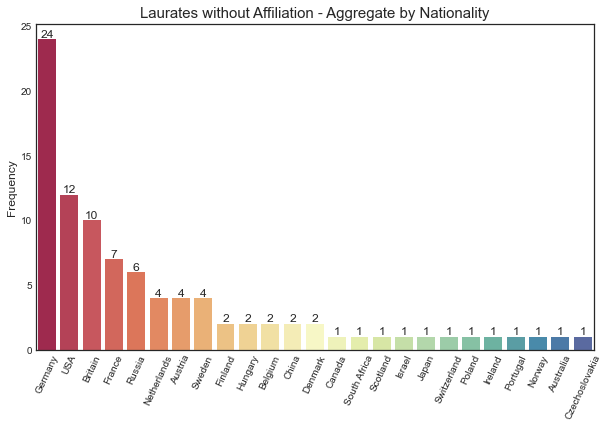

In [5]:
''' Which countries are missing '''
plt.style.use("seaborn-white")
fig, ax = plt.subplots(figsize=(10, 6))
plt.title('Laurates without Affiliation - Aggregate by Nationality', size = 15)

''' Hvem er missing i fht. nationalitet '''
freqz = no_aff.nationality.value_counts()
_ax = sns.barplot(x=freqz.index,y=freqz.values, palette = "Spectral")
_ax.bar_label(_ax.containers[0], size = 12)
plt.xticks(rotation=65)
ax.set_ylabel('Frequency', size = 12)
plt.savefig("bortfald/nationality_bortfald.png", dpi=200, bbox_inches="tight")

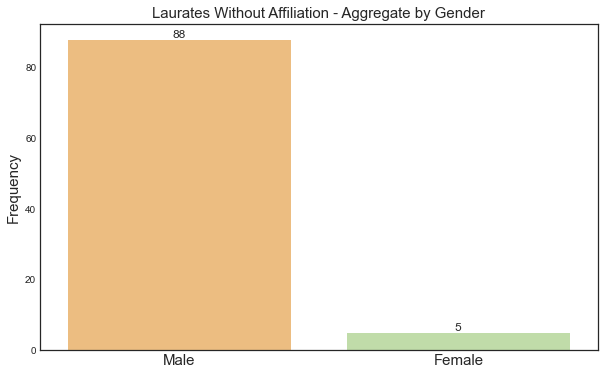

In [6]:
''' Which countries are missing '''
plt.style.use("seaborn-white")
fig, ax = plt.subplots(figsize=(10, 6))
plt.title('Laurates Without Affiliation - Aggregate by Gender', size = 15)

''' Hvem er missing i fht. nationalitet '''
freqz = no_aff.gender_mf.value_counts()
_ax = sns.barplot(x=freqz.index,y=freqz.values, ax=ax, palette = "Spectral")
_ax.bar_label(_ax.containers[0], size = 12) # count on top of barplot
#ax.set_xticks(freqz.index)
ax.set_xticklabels(['Male', 'Female'], size = 15)
plt.yticks(size = 10)
ax.set_ylabel('Frequency', size = 15)
plt.savefig("bortfald/gender_bortfald.png", dpi=200, bbox_inches="tight")

## Relative dropout 

In [7]:
m1 = no_aff.nationality.value_counts().reset_index(name='count_no_aff')
m2 = no_dub.nationality.value_counts().reset_index(name='count_tot')

def _rel(sub, tot):
    return sub/tot

rel_dropout_nat = m1.merge(m2, on = "index", how = "left").set_index('index')\
                          .apply(lambda x: _rel(x.count_no_aff, x.count_tot), axis = 1)\
                          .sort_values(ascending = False).round(2)


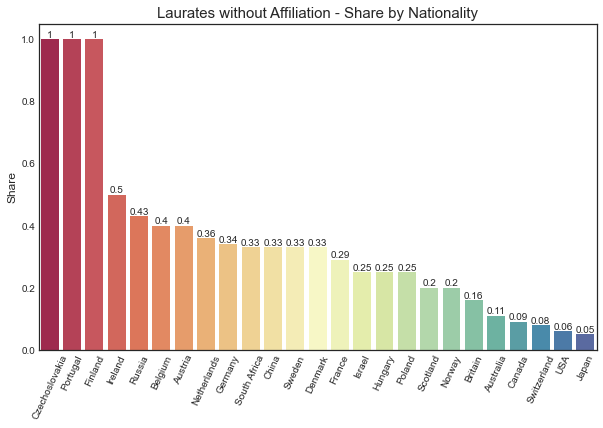

In [8]:
plt.style.use("seaborn-white")
fig, ax = plt.subplots(figsize=(10, 6))
plt.title('Laurates without Affiliation - Share by Nationality', size = 15)

_ax = sns.barplot(x=rel_dropout_nat.index,y=rel_dropout_nat.values, palette = "Spectral")
_ax.bar_label(_ax.containers[0], size = 10)
plt.xticks(rotation=65)
ax.set_ylabel('Share', size = 12)
ax.set_xlabel(None)
plt.savefig("bortfald/nationality_bortfald_relativ.png", dpi=200, bbox_inches="tight")

In [9]:
m1 = no_aff.gender_mf.value_counts().reset_index(name='count_no_aff')
m2 = no_dub.gender_mf.value_counts().reset_index(name='count_tot')

rel_dropout_gend = m1.merge(m2, on = "index", how = "left").set_index('index')\
                          .apply(lambda x: _rel(x.count_no_aff, x.count_tot), axis = 1)\
                          .sort_values(ascending = False).round(2)

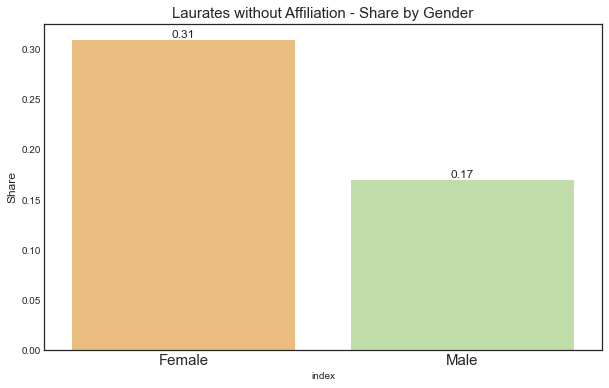

In [10]:
plt.style.use("seaborn-white")
fig, ax = plt.subplots(figsize=(10, 6))
plt.title('Laurates without Affiliation - Share by Gender', size = 15)

_ax = sns.barplot(x=rel_dropout_gend.index,y=rel_dropout_gend.values, palette = "Spectral")
_ax.bar_label(_ax.containers[0], size = 12)
ax.set_ylabel('Share', size = 12)
ax.set_xticklabels(['Female', 'Male'], size = 15)
plt.savefig("bortfald/gender_bortfald_relativ.png", dpi=200, bbox_inches="tight")

In [11]:
''' print table instead  '''
m1 = no_aff.gender_mf.value_counts().reset_index(name='count_no_aff')
m2 = no_dub.gender_mf.value_counts().reset_index(name='count_tot')

gender_drop = m1.merge(m2, on = "index", how = "left").set_index('index')

gender_drop['dropout_share'] = gender_drop.apply(lambda x: _rel(x.count_no_aff, x.count_tot), axis = 1)\
                                       .sort_values(ascending = False).round(2)

gender_drop

,count_no_aff,count_tot,dropout_share
index,,,
M,88,526,0.17
F,5,16,0.31


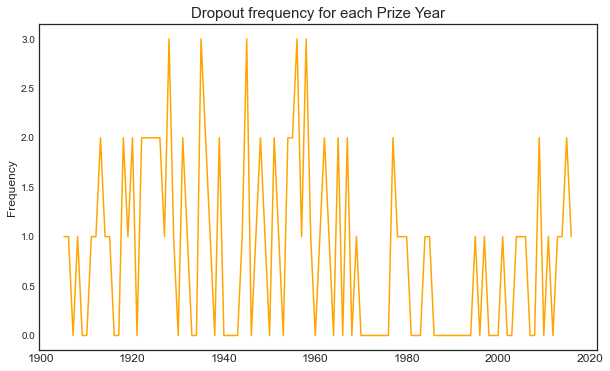

In [12]:
import math 
_vals = no_aff.value_counts('prize_year')

# Set year with no value to 0 and add to the data 
data_dict = {key:val for key, val in zip(_vals.index, _vals.values)}
# update dict 
[data_dict.update({key:0}) for key in range(min(_vals.index),max(_vals.index)) \
                            if key not in data_dict.keys()];

# Get year ticks every 10'th year 
_ticks = [min(_vals.index)] + list(range(math.ceil(min(_vals.index)/10)*10,
                                         math.ceil(max(_vals.index)/10)*10,
                                         10)) + [max(_vals.index)]

# set labels to "" if not in the 10'th year _ticks                            
_labels = [str(int(x)) if x in _ticks else '' for x in sorted(list(data_dict.keys()))]

fig, ax = plt.subplots(figsize=(10, 6))
plt.title('Dropout frequency for each Prize Year', size = 15)
#ax.set_xticks([1826]+list(range(1830,2016, 10)) + [2016])
sns.lineplot(x=list(data_dict.keys()), y=list(data_dict.values()), ax=ax, color = "orange")
plt.xticks(size=12)
plt.ylabel("Frequency",size=12)

plt.savefig("bortfald/pr_prizeyear_bortfald.png", dpi=200, bbox_inches="tight")
plt.show()

### Remove those without affiliation

In [13]:
''' Cleaning '''
# Remove observations without affiliation (or name, but might be redundant)
# We can't use those in the network analysis

_tot = master.laureate_name.nunique()
print('In total: ', _tot)
master = master.dropna(subset=["laureate_name", "affiliation"])
_subtot = master.laureate_name.nunique()
print('With affiliation at some point:', _subtot)
print('Without affiliation at any point: ', _tot-_subtot)

In total:  542
With affiliation at some point: 449
Without affiliation at any point:  93


In [14]:
print('Unique organizations:', master.affiliation.nunique())

Unique organizations: 452


In [15]:
''' Hvor mange år mangler i datasættet '''
print([i for i in range(1901,2017) if i not in list(master.prize_year.unique())])

[1901, 1903, 1904, 1905, 1906, 1908, 1909, 1910, 1911, 1913, 1916, 1918, 1919, 1924, 1926, 1928, 1931, 1940, 1941, 1942]


In [16]:
''' Save '''
master.to_csv('final_data_set.csv', sep = ';', encoding="utf-8", index=False)

# På tværs af tid

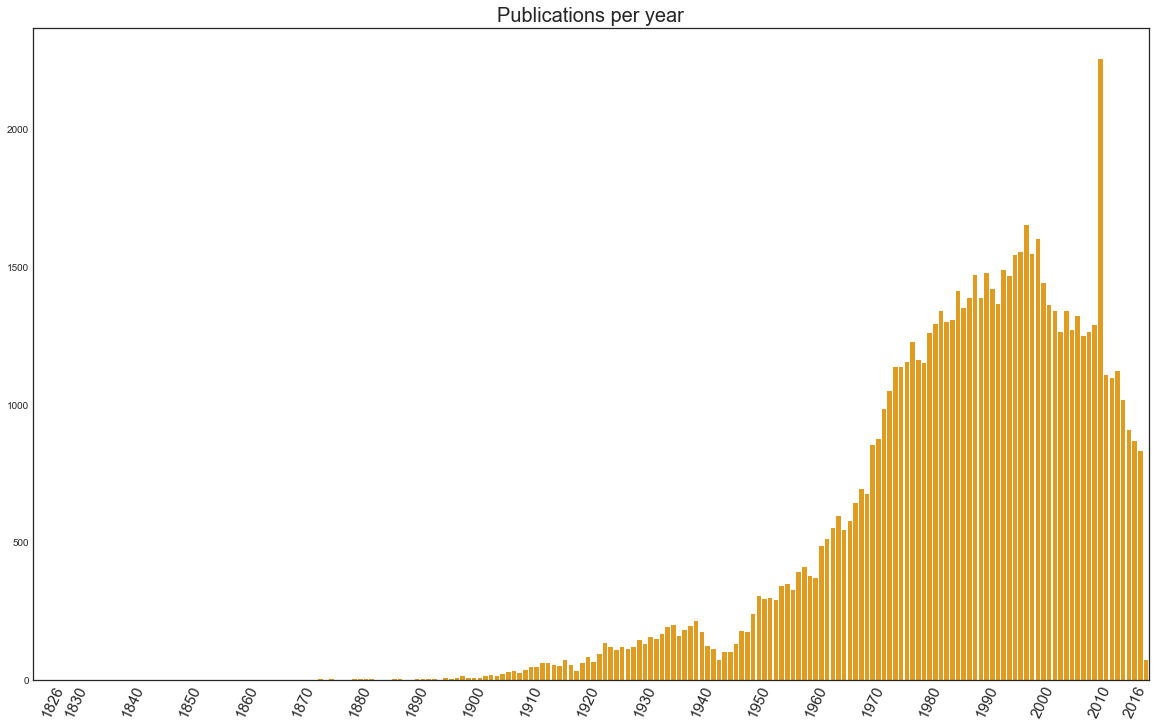

In [17]:
plt.style.use('seaborn-white')
_vals = master['pub_year'].value_counts()

# Set year with no value to 0 and add to the data 
data_dict = {key:val for key, val in zip(_vals.index, _vals.values)}
[data_dict.update({key:0}) for key in range(1823,2017) if key not in data_dict.keys()];

_ticks = [1826] + list(range(1830,2016, 10)) + [2016]
_labels = [str(int(x)) if x in _ticks else '' for x in sorted(list(data_dict.keys()))]

fig, ax = plt.subplots(figsize=(20, 12))
plt.title('Publications per year', size = 20)
#ax.set_xticks([1826]+list(range(1830,2016, 10)) + [2016])
sns.barplot(x=list(data_dict.keys()), y=list(data_dict.values()), ax=ax, color = "orange")
ax.set_xticklabels(_labels, rotation=65, size = 15);

plt.show()

<AxesSubplot:title={'center':'Years between publication and prize year'}>

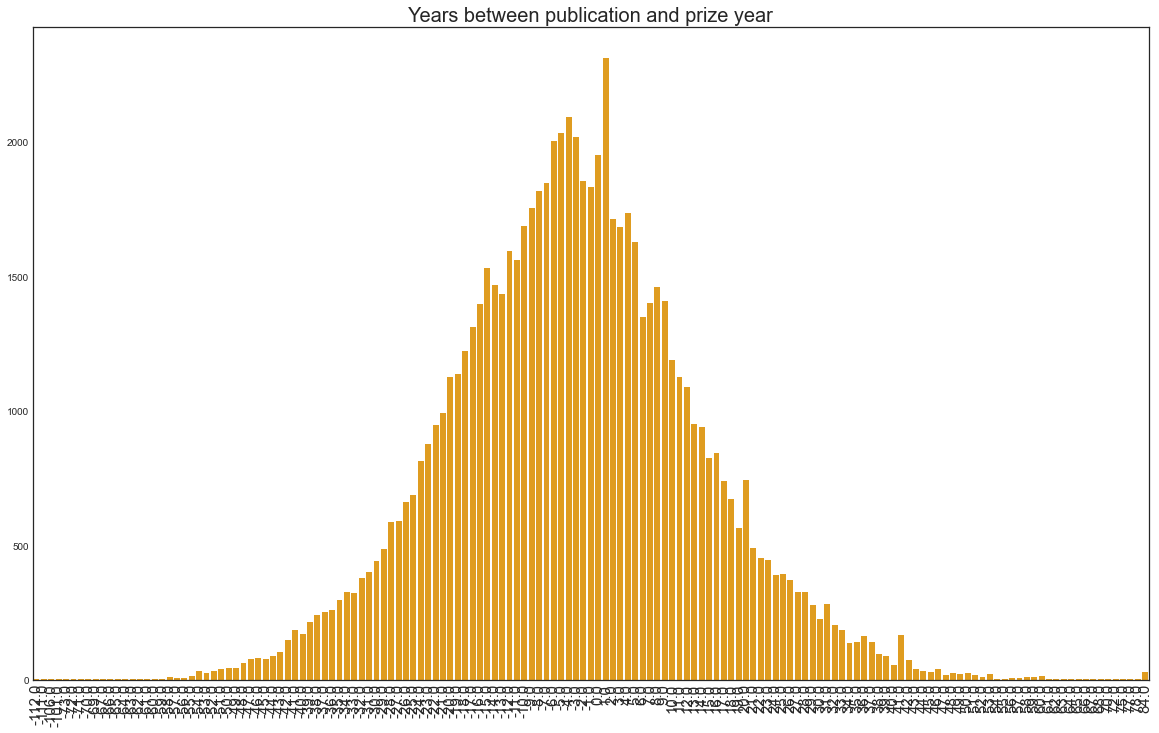

In [18]:
# diff between publication year and prize year 
master['pub_prize_diff'] = master.apply(lambda x: x['pub_year']- x['prize_year'], axis =1)

_vals = master['pub_prize_diff'].value_counts()
fig, ax = plt.subplots(figsize=(20, 12))
plt.xticks(rotation=90, size = 15)
plt.title('Years between publication and prize year', size = 20)
sns.barplot(x=_vals.index, y=_vals.values, ax=ax,color = "orange")

<AxesSubplot:title={'center':'Distribution of Birth year'}>

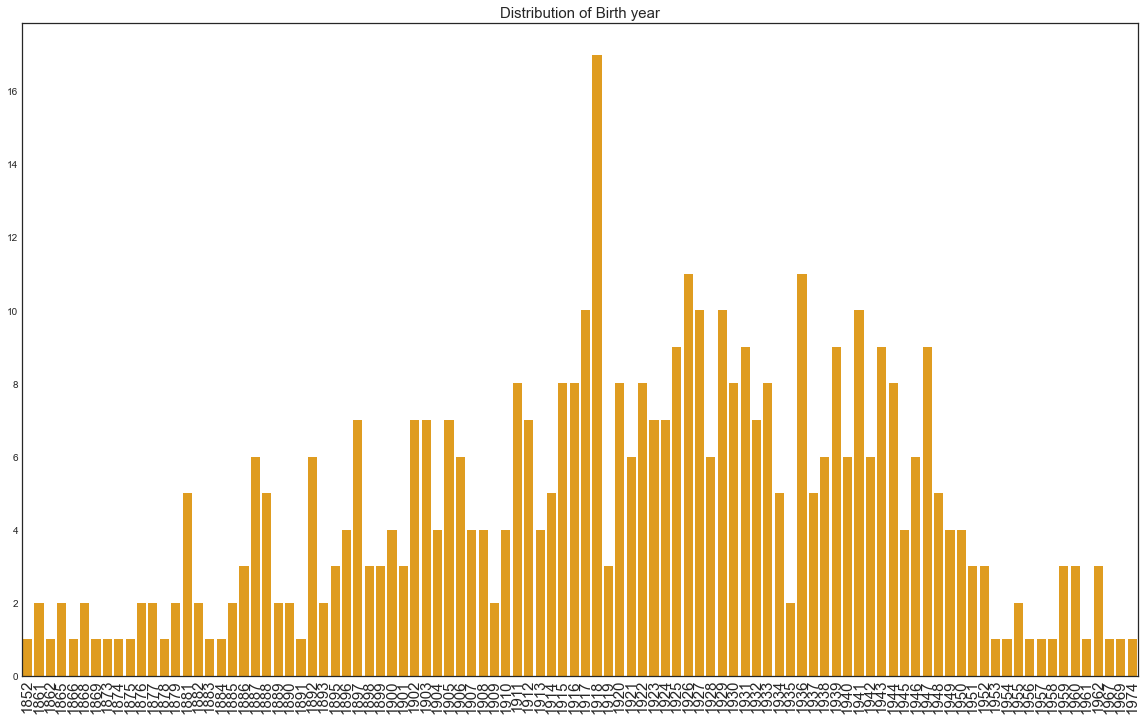

In [19]:
b_year = master.drop_duplicates('laureate_name').birthyear.value_counts()
fig, ax = plt.subplots(figsize=(20, 12))
plt.title('Distribution of Birth year', size = 15)
plt.xticks(rotation=90, size = 15)
sns.barplot(x=b_year.index, y = b_year.values, color = "orange")

<AxesSubplot:title={'center':'Age at Nobel Prize'}>

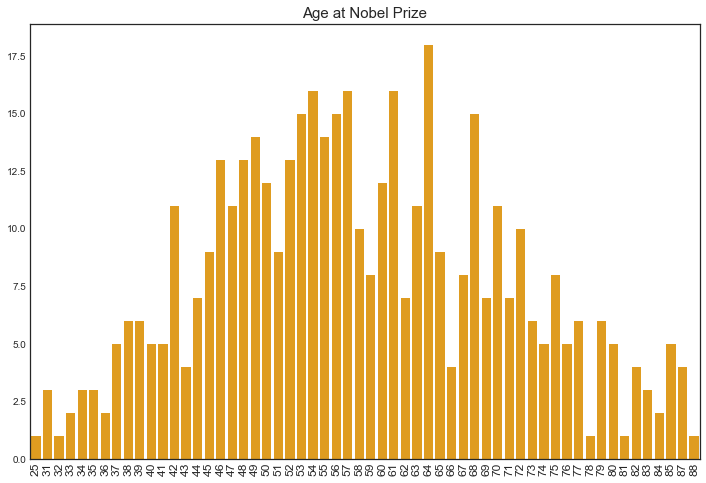

In [20]:
# diff between publication year and prize year 
master['birth_prize_diff'] = master.apply(lambda x: x['prize_year']- x['birthyear'], axis =1)

b_year = master.drop_duplicates('laureate_name').birth_prize_diff.value_counts()
fig, ax = plt.subplots(figsize=(12, 8))
plt.title('Age at Nobel Prize', size = 15)
plt.xticks(rotation=90, size = 12)
sns.barplot(x=b_year.index, y = b_year.values, color = "orange")

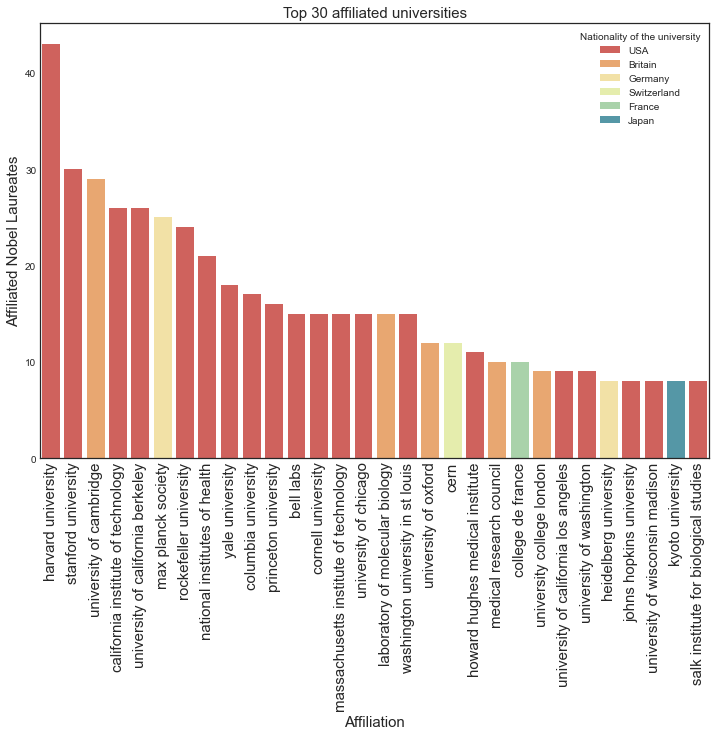

In [373]:
plt.style.use('seaborn-white')
afil_count = master.drop_duplicates(['laureate_name', 'affiliation']).affiliation.value_counts()

# Merge university data onto the value count
afil_freq = afil_count.reset_index(name='freq')\
                      .merge(uni_df, 
                             left_on ='index', 
                             right_on = 'affiliation').drop('index', axis =1)

sub = 30
sub_set = afil_freq.iloc[:sub, :].copy()

fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(data = sub_set, 
            x="affiliation",
            y = "freq",
            hue = 'uni_nationality',
            orient = 'v',
            dodge = False,
            palette = "Spectral")

ax.set_title(f'Top {sub} affiliated universities', size = 15)
ax.set_xlabel('Affiliation', size = 15)
ax.set_ylabel('Affiliated Nobel Laureates', size = 15)
plt.xticks(rotation=90, size = 15)
plt.legend(title = 'Nationality of the university')

plt.savefig("Plots/top_unis.png", dpi=200, bbox_inches="tight")

plt.show()

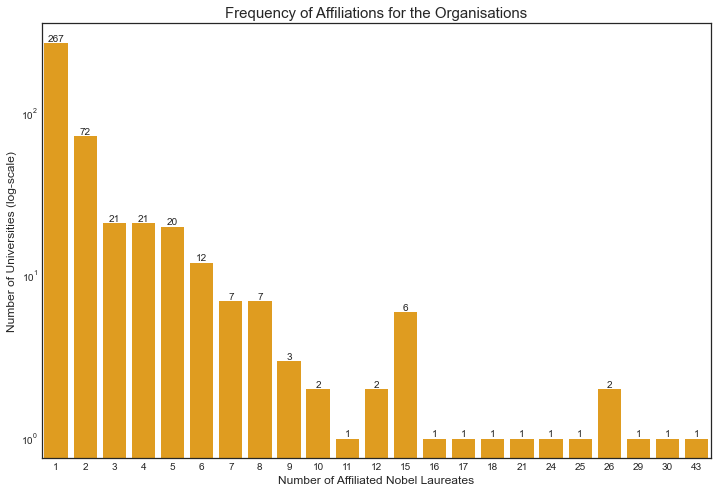

In [374]:
freq_count = afil_count.value_counts()
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Frequency of Affiliations for the Organisations", size = 15)
ax.set_xlabel('Number of Affiliated Nobel Laureates', size = 12)
ax.set_ylabel('Number of Universities (log-scale)', size = 12)
_ax = sns.barplot(x=freq_count.index, y = freq_count.values, ax=ax, color = 'orange')
_ax.bar_label(_ax.containers[0], size = 10)
ax.set_yscale('log')
plt.savefig("Plots/affil_freq_org.png", dpi=200, bbox_inches="tight")

plt.show()

# World Map


### Laureates 

In [375]:
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.query('name!="Antarctica"')
individ = master.drop_duplicates('laureate_name').copy() # kun enkelt individ
individ.nationality = individ.nationality.apply(lambda x: x.split(', ')[0].strip())

# for plotting the world 
clean_dict = {'USA': "United States of America",
              "Britain":"United Kingdom",
              "Scotland":"United Kingdom",
              'Czech Republic':'Czechia', 
              'Czechoslovakia':'Czechia'}

individ.nationality = individ.nationality.apply(lambda x: clean_dict[x]\
                                                if x in clean_dict.keys() else x)

# Merge
test = world.merge(individ, how = 'right', right_on = "nationality", left_on = "name")

print('How many could not merge?:')
print(len(test[pd.isna(test.geometry)].nationality.unique()))

How many could not merge?:
0


In [376]:
import matplotlib.pylab as plt
%matplotlib inline

# Count countries
country_freq = test.groupby('nationality').agg('count')[['title']].reset_index()
# Get geometry 
countries = test.drop_duplicates('geometry')[['nationality','geometry']]
# 
countries = countries.merge(country_freq, on = 'nationality')

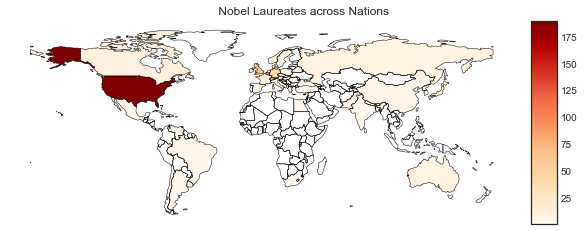

In [377]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.style.use('seaborn-white')

fig, ax = plt.subplots(1, 1, figsize = (10,10))

plt.axis('off')
plt.title('                         Nobel Laureates across Nations')
# Align legend
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world.boundary.plot(color='black', ax=ax, linewidth=0.5)

countries.plot('title', ax=ax, legend=True, cax=cax, cmap='OrRd')

plt.savefig('Plots/laureate_world_map.png', dpi = 200, bbox_inches='tight')

### Organizations

Lidt mærkelig en - det er hvor mange affiliation et land har haft med laureates... så alle Havard ca. 40 laureates + standford ca. 30 osv. er USA 

In [389]:
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.query('name!="Antarctica"')
org = master.drop_duplicates(['laureate_name','affiliation']).copy() # kun enkelt individ
org.uni_nationality = org.uni_nationality.apply(lambda x: x.split(', ')[0].strip())

# for plotting the world 
clean_dict = {'USA': "United States of America",
              "Britain":"United Kingdom",
              "Scotland":"United Kingdom",
              'Czech Republic':'Czechia', 
              'Czechoslovakia':'Czechia'}

org.uni_nationality = org.uni_nationality.apply(lambda x: clean_dict[x]\
                                                if x in clean_dict.keys() else x)

# Merge
test = world.merge(org, how = 'inner', right_on = "uni_nationality", left_on = "name")

print('How many could not merge?:')
print(len(test[pd.isna(test.geometry)].uni_nationality.unique()))

How many could not merge?:
0


In [390]:
import matplotlib.pylab as plt
%matplotlib inline

# Count countries
country_freq = test.groupby('uni_nationality').agg('count')[['title']].reset_index()
# Get geometry 
countries = test.drop_duplicates('geometry')[['uni_nationality','geometry']]
# 
countries = countries.merge(country_freq, on = 'uni_nationality')

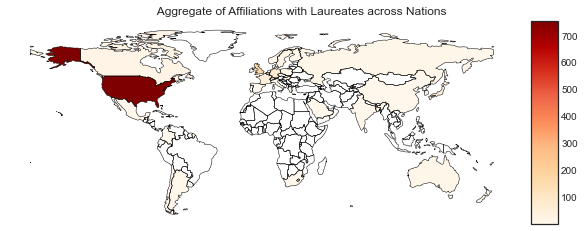

In [391]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.style.use('seaborn-white')

fig, ax = plt.subplots(1, 1, figsize = (10,10))

plt.axis('off')
plt.title('                         Aggregate of Affiliations with Laureates across Nations ')
# Align legend
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)


world.boundary.plot(color='black', ax=ax, linewidth=0.5)

countries.plot('title', ax=ax, legend=True, cax=cax, cmap='OrRd')

plt.savefig('Plots/org_affil_world_map.png', dpi = 200, bbox_inches='tight')

### Organization - Normal

In [383]:
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.query('name!="Antarctica"')
org = master.drop_duplicates(['affiliation']).copy() # kun enkelt individ
org.uni_nationality = org.uni_nationality.apply(lambda x: x.split(', ')[0].strip())

# for plotting the world 
clean_dict = {'USA': "United States of America",
              "Britain":"United Kingdom",
              "Scotland":"United Kingdom",
              'Czech Republic':'Czechia', 
              'Czechoslovakia':'Czechia'}

org.uni_nationality = org.uni_nationality.apply(lambda x: clean_dict[x]\
                                                if x in clean_dict.keys() else x)

# Merge
test = world.merge(org, how = 'inner', right_on = "uni_nationality", left_on = "name")

print('How many could not merge?:')
print(len(test[pd.isna(test.geometry)].uni_nationality.unique()))

How many could not merge?:
0


In [384]:
import matplotlib.pylab as plt
%matplotlib inline

# Count countries
country_freq = test.groupby('uni_nationality').agg('count')[['title']].reset_index()
# Get geometry 
countries = test.drop_duplicates('geometry')[['uni_nationality','geometry']]
# 
countries = countries.merge(country_freq, on = 'uni_nationality')

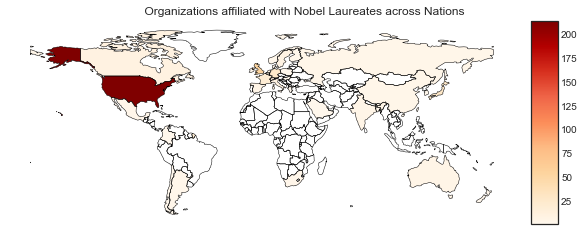

In [387]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.style.use('seaborn-white')

fig, ax = plt.subplots(1, 1, figsize = (10,10))

plt.axis('off')
plt.title('                         Organizations affiliated with Nobel Laureates across Nations')

# Align legend
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)


world.boundary.plot(color='black', ax=ax, linewidth=0.5)

countries.plot('title', ax=ax, legend=True, cax=cax, cmap='OrRd')

plt.savefig('Plots/n_orgs_world_map.png', dpi = 200, bbox_inches='tight')